# Notebook to create examplary plots

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Adjust path if the package is not installed
import sys
sys.path.append('.')  # Assumes root contains battery_ocv_toolbox/
# Import the package
from ocv_teaching import OCV, ActiveMaterial, OCVBlending, CellOCVReconstruction
from ocv_teaching.plot_ocv import plot_ocv

## Load data

In [ ]:
NCM811_df = pd.read_csv('../ocv_data/NMC811_half_cell_ocv.csv')
Graphite_df = pd.read_csv('../ocv_data/Graphite_half_cell_ocv.csv')
LFP_df = pd.read_csv('../ocv_data/LFP_half_cell_ocv.csv')
Silicon_df = pd.read_csv('../ocv_data/Silicon_half_cell_ocv.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'ocv_data/NMC811_half_cell_ocv.csv'

## 2. Instantiate OCV and ActiveMaterial objects 

In [ ]:
NCM811_ocv = OCV(NCM811_df["SOC"], NCM811_df["Voltage"], NCM811_df["Voltage"])
Graphite_ocv = OCV(Graphite_df["SOC"], Graphite_df["Voltage"], Graphite_df["Voltage"])
LFP_ocv = OCV(LFP_df["SOC"], LFP_df["Voltage"], LFP_df["Voltage"])
Silicon_ocv = OCV(Silicon_df["SOC"], Silicon_df["Voltage"], Silicon_df["Voltage"])

NCM811_mat = ActiveMaterial(NCM811_ocv, specific_capacity=212, formation_loss=0.09)
Graphite_mat = ActiveMaterial(Graphite_ocv, specific_capacity=372, formation_loss=0.08)
LFP_mat = ActiveMaterial(LFP_ocv, specific_capacity=170, formation_loss=0.07)
Silicon_mat = ActiveMaterial(Silicon_ocv, specific_capacity=3600, formation_loss=0.12)


# 3. Compare the different materials

(<Figure size 800x600 with 1 Axes>,
 <Axes: xlabel='Stat of lithiation (SoL)', ylabel='Voltage (V)'>)

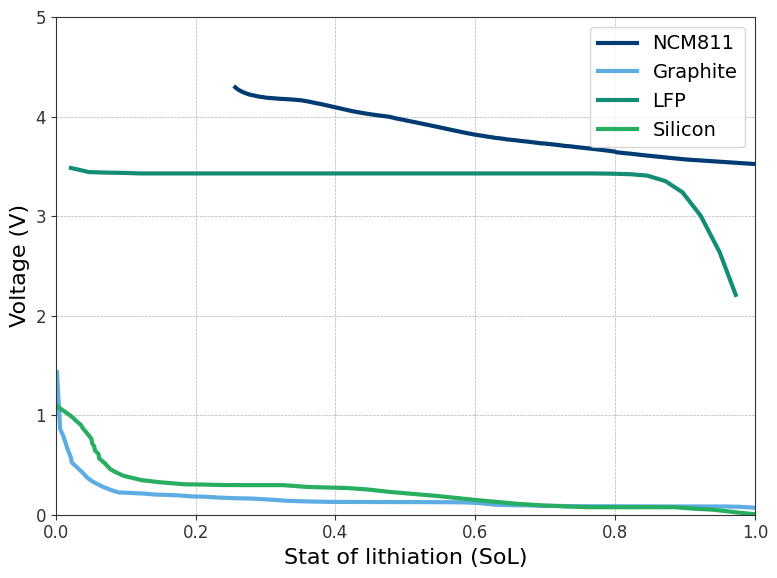

In [ ]:
curves = []
ocvs = [NCM811_ocv, Graphite_ocv, LFP_ocv, Silicon_ocv]
names = ['NCM811', 'Graphite', 'LFP', 'Silicon']
for name,ocv in zip(names, ocvs):
    curves.append({
        'x': ocv.soc,
        'y': ocv.voltage_charge,
        'label': name
    })#
plot_ocv(curves, 
         x_label='Stat of lithiation (SoL)', 
         y_label='Voltage (V)', 
         x_lim=[0, 1], 
         y_lim=[0, 5], 
         legend_loc='best', 
         figsize=(8, 6), 
         grid=True)